# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [61]:
import pandas as pd

import warnings
warnings.simplefilter('ignore')

## Regression Model Evaluation

In [6]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [54]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,test_size=0.2)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512, 1), (4128, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [41]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train,y_train)

y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [42]:
from sklearn.metrics import r2_score as r2

r2_score_train = r2(y_train, y_pred_train)
r2_score_test = r2(y_test, y_pred_test)

r2_score_train , r2_score_test

(0.6027192826595509, 0.619507549005251)

## 4. Calculate and print mean squared error for both the training and the testing set.

In [55]:
from sklearn.metrics import mean_squared_error as mse


rmse_train = mse(y_train, y_pred_train, squared=False)
rmse_test = mse(y_test, y_pred_test, squared=False)

rmse_train ,rmse_test

(0.7251793423025295, 0.7201100926988514)

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [56]:
from sklearn.metrics import mean_absolute_error as mae

mae_train = mae(y_test,y_pred_test)
mae_test = mae (y_test,y_pred_test)

mae_train , mae_test

(0.5290517828377901, 0.5290517828377901)

## Classification Model Evaluation

In [57]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,test_size=0.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [62]:
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [66]:
from sklearn.metrics import accuracy_score as acc

acc(y_test,y_pred_test) , acc(y_train,y_pred_train)

(0.8666666666666667, 0.975)

In [65]:
acc(y_test,y_pred_test) , acc(y_train,y_pred_train)

(0.8666666666666667, 0.975)

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [67]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test,y_pred_test) , balanced_accuracy_score(y_train,y_pred_train)

(0.8974358974358975, 0.9738969738969739)

## 10. Calculate and print the precision score for both the training and the testing set.

In [74]:
from sklearn.metrics import precision_score

precision_score(y_test,y_pred_test,average='weighted') , precision_score(y_train,y_pred_train,average='weighted')

(0.9022222222222223, 0.975219298245614)

## 11. Calculate and print the recall score for both the training and the testing set.

In [78]:
from sklearn.metrics import recall_score

recall_score(y_test,y_pred_test,average='weighted') , recall_score(y_train,y_pred_train,average='weighted')

(0.8666666666666667, 0.975)

## 12. Calculate and print the F1 score for both the training and the testing set.

In [80]:
from sklearn.metrics import f1_score

f1_score(y_test,y_pred_test,average='weighted') , f1_score(y_train,y_pred_train,average='weighted')

(0.8648018648018646, 0.9750043290043291)

## 13. Generate confusion matrices for both the training and the testing set.

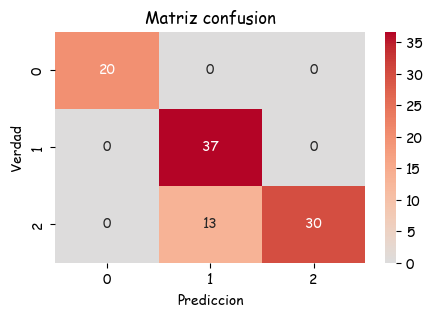

In [108]:
from sklearn.metrics import confusion_matrix 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(5, 3))

sns.heatmap(confusion_matrix(y_test, y_pred_test)/confusion_matrix(y_test, y_pred_test).sum() * 100, 
               annot=True,
               cmap='coolwarm',
               center = 0 )

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

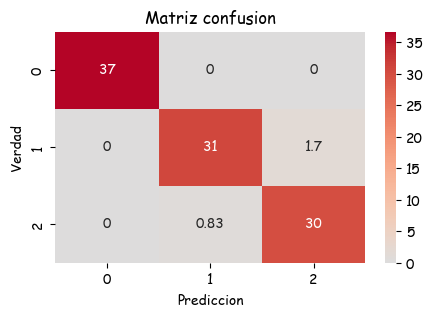

In [107]:
plt.figure(figsize=(5, 3))

sns.heatmap(confusion_matrix(y_train, y_pred_train)/confusion_matrix(y_train, y_pred_train).sum() * 100, 
               annot=True,
               cmap='coolwarm',
               center = 0 )

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.